# Ch8. 서포트 벡터 머신

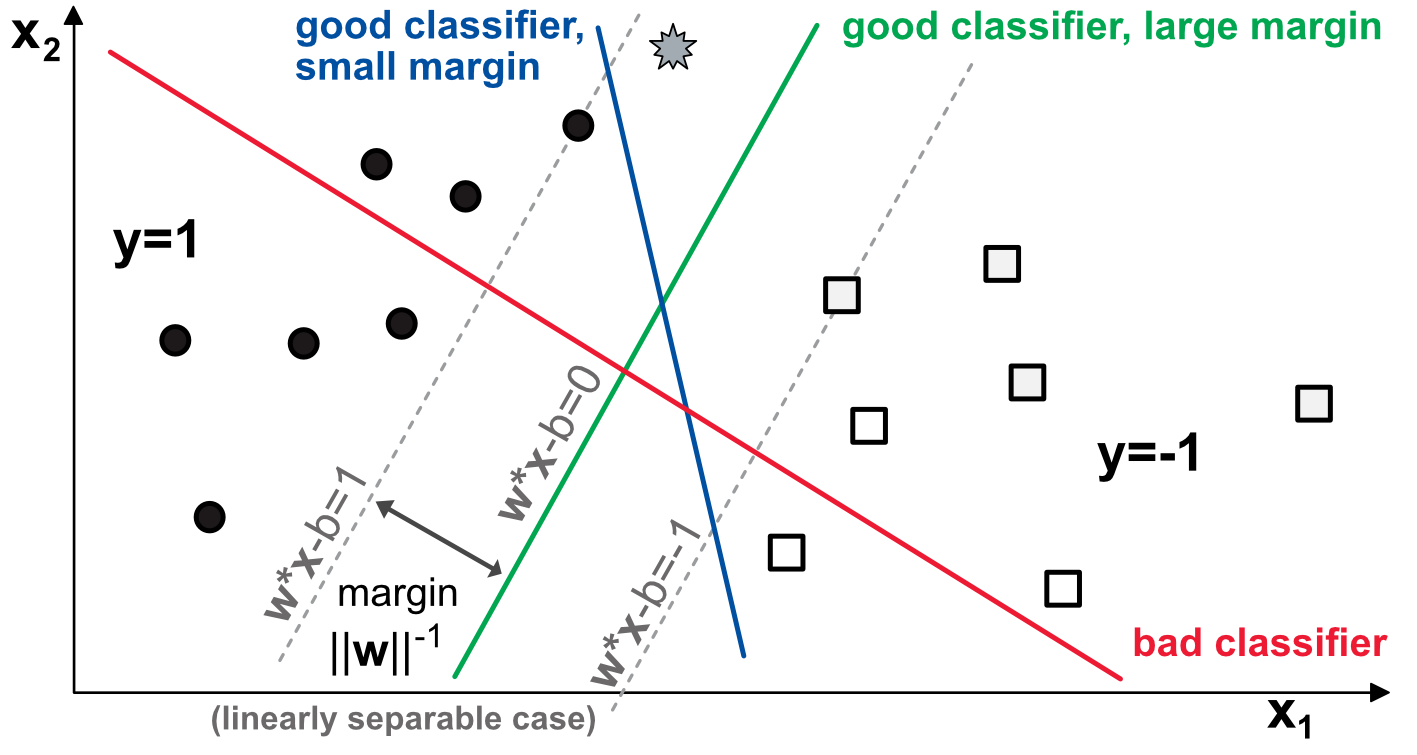

- 모델: 2개의 가중치 $(w_1, w_2)$로 구성됨
- 회색 점선: 녹색 모델을 시행할 때 어떠한 관측도 불가능한 접근 불가 구역 => 모델에 대한 오차의 마진
- 두 마진: 모델 <=> 양쪽 모두에서 올바르게 분류된 가장 가까운 점들 사이의 거리를 최대화하는 평행선으로 계산됨 ~ 그 점들을 "서포트 벡터"라고 함
$\\ \rarr$ 녹색 모델이 파란색 보델보다 더 넓은 마진을 가짐
- SVM의 Main Idea: 분류기가 실수하지 않는다는 제약 조건하에서 마진을 극대화하는 것 -> 올바른 분류 산출하는 모든 모델들 중에서 가장 강력한 모델 선택하려 노력함
- 선형 모델: 다음을 만족 ~ $\begin{equation}
\tag{8.1}
\left\{\begin{array}{lll}
\sum_{k=1}^Kw_kx_{i,k}+b \ge +1 & \text{ when } y_i=+1 \\
\sum_{k=1}^Kw_kx_{i,k}+b \le -1 & \text{ when } y_i=-1,
\end{array}\right.
\end{equation}$


$\rarr$ 위 식을 축약하면: $y_i\times(\sum^K_{k=1}w_kx_{i,k}+b)\ge 1$
$\\ \rarr$ 서포트 벡터 간 마진: $||\textbf{w}||^{-1}=\left(\sum_{k=1}^Kw_k^2\right)^{-1/2}$ by 거리 공식 $d=\frac{|ax_0+by_0+c|}{\sqrt{a^2+b^2}}$

$\therefore \begin{equation}
\tag{8.2}
\underset{\textbf{w}, b}{\text{argmin}} \ \frac{1}{2} ||\textbf{w}||^2 \ \text{ s.t. } y_i\left(\sum_{k=1}^Kw_kx_{i,k}+b \right)\ge 1.
\end{equation}$
$\\ \rarr$ In 라그랑지안: $\begin{equation}
\tag{8.3}
L(\textbf{w},b,\boldsymbol{\lambda})=
\frac{1}{2}||\textbf{w}||^2 + \sum_{i=1}^I\lambda_i\left(y_i\left(\sum_{k=1}^Kw_kx_{i,k}+b \right)- 1\right),
\end{equation}$

$\rarr$ 여기서 $\lambda_i=0$ or $y_i(\sum^K_{k=1}w_kx_{i,k}+b)=1
- 1계 조건(라그랑지안 도함수=0) 풀면: $w^*=\sum^I_{i=1}\lambda_iu_ix_i$ ~ 특성에 대한 선형 형태 but 오직 일부 포인트만을 고려함
- if 조건 만족 불가, 해당 데이터셋은 선형적으로 분리할 수 없는 데이터셋임
- 트릭: 조건 충족 가능한 보정 변수 추가 
$\\ \begin{equation}
\tag{8.4}
\left\{\begin{array}{lll}
\sum_{k=1}^Kw_kx_{i,k}+b \ge +1-\xi_i & \text{ when } y_i=+1 \\
\sum_{k=1}^Kw_kx_{i,k}+b \le -1+\xi_i & \text{ when } y_i=-1,
\end{array}\right.
\end{equation}$
- $\xi_i$: 조건을 실현 가능케 만드는 '여유'변수 ~ Slack Variable -> 두 클래스를 완벽히 구분할 수 있는 단순한 선형 모델이 없음

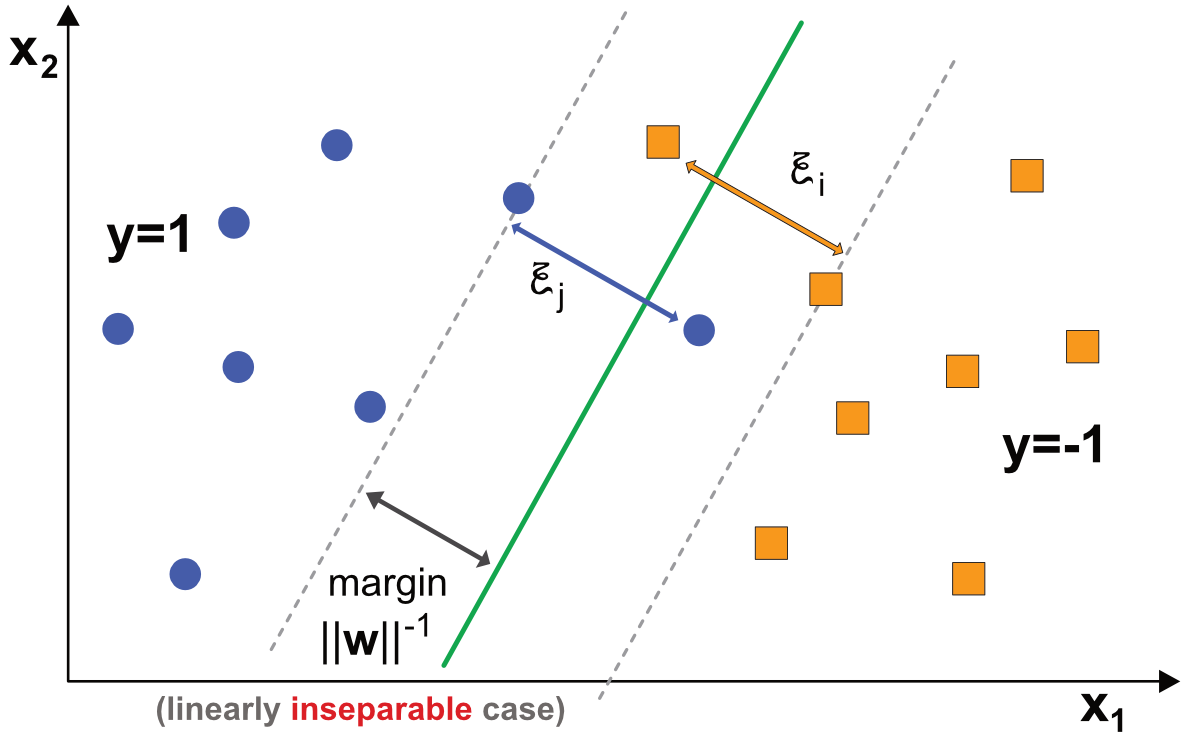

$\begin{equation}
\tag{8.5}
\underset{\textbf{w},b, \boldsymbol{\xi}}{\text{argmin}} \ \frac{1}{2} ||\textbf{w}||^2+C\sum_{i=1}^I\xi_i \ \text{ s.t. } \left\{ y_i\left(\sum_{k=1}^Kw_k\phi(x_{i,k})+b \right)\ge 1-\xi_i \ \text{ and } \ \xi_i\ge 0, \ \forall i  \right\},
\end{equation}$
- 양수인 매개 변수 C: 분류 오차에 대한 비용 조율함
- $x_{i,k}$에 적용하는 커널 $\phi$를 통해 비선형 모델로 일반화 가능 ~ Generally, 다항식, 방사형, or 시그모이드

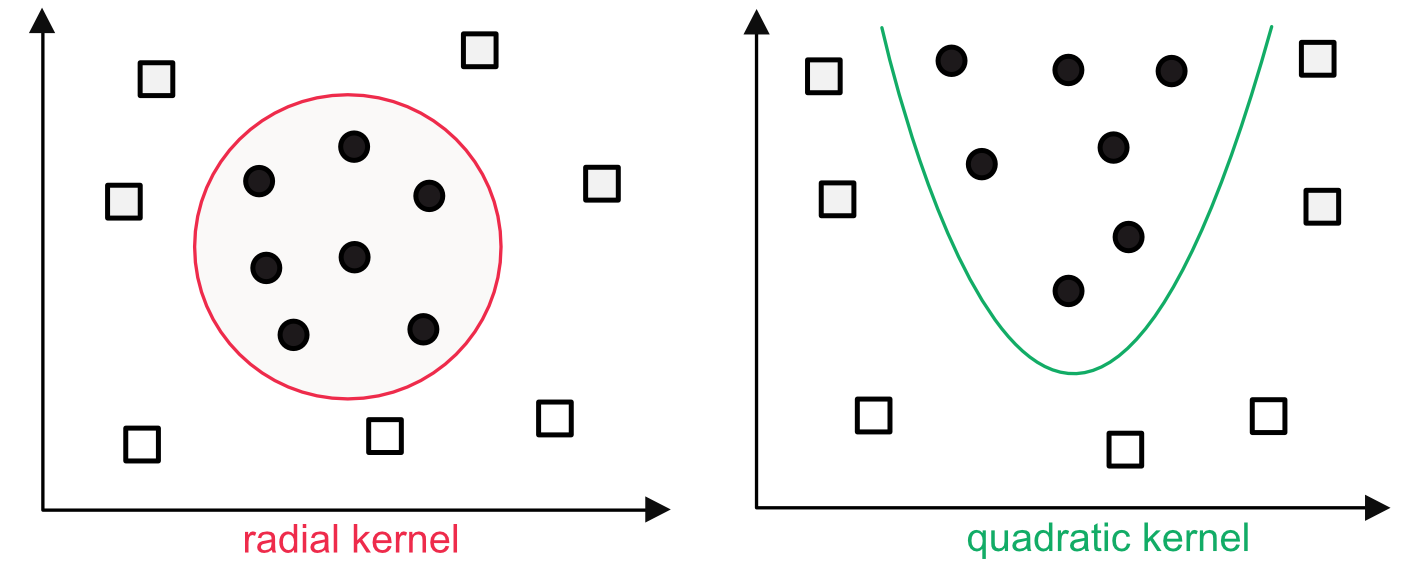

[8.2] 회귀를 위한 SVM
$\\$: 마진의 역할이 달라짐
$\\ \begin{align}
\underset{\textbf{w},b, \boldsymbol{\xi}}{\text{argmin}} \  & \frac{1}{2} ||\textbf{w}||^2+C\sum_{i=1}^I\left(\xi_i+\xi_i^* \right)\\
\text{ s.t. }&  \sum_{k=1}^Kw_k\phi(x_{i,k})+b -y_i\le \epsilon+\xi_i \\ \tag{8.6}
&  y_i-\sum_{k=1}^Kw_k\phi(x_{i,k})-b \le \epsilon+\xi_i^* \\
&\xi_i,\xi_i^*\ge 0, \ \forall i  ,
\end{align}$
- 마진 $\epsilon$ 지정: 모델은 레이블 $y_i$와 입력 변수 $x_i$ 사이의 선형 관계를 찾으려 시도함 ~ 크게 설정하면 오류가 더 많이 발생할 가능성이 있음
- 데이터 포인트가 Strip 내부에 있으면 여유 변수 $\xi_i, \xi_i^*$를 0으로 설정 

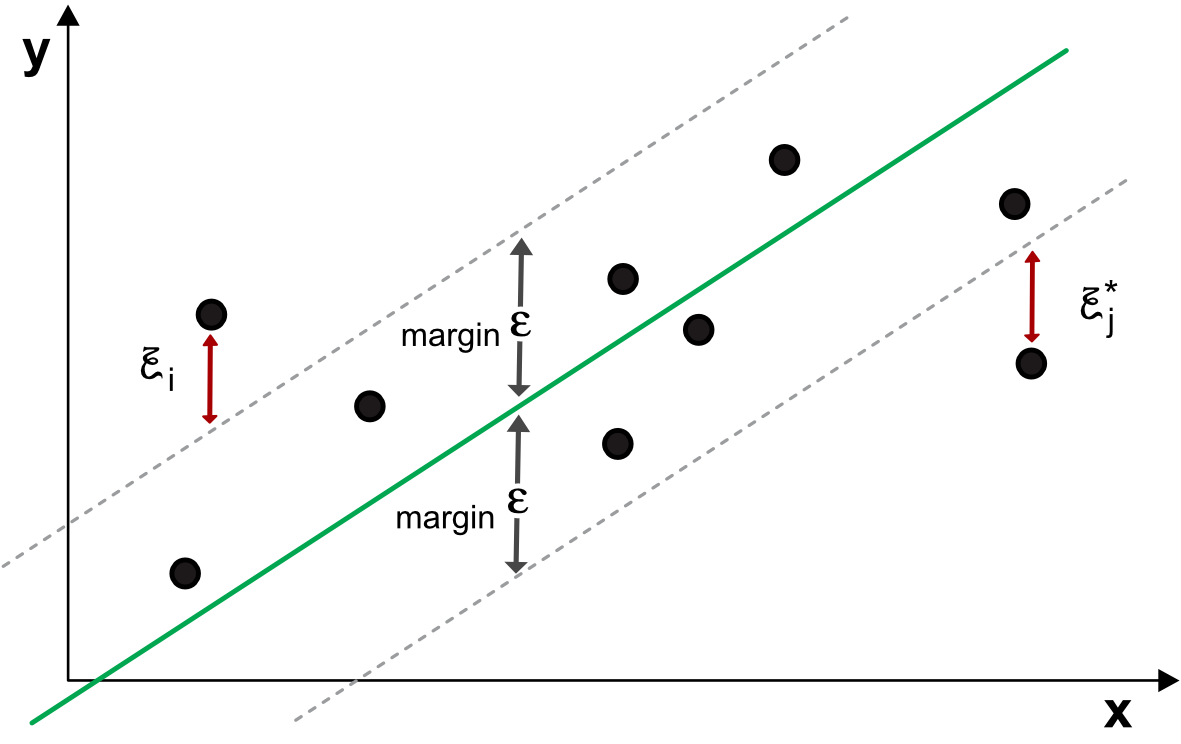

: 오차가 충분히 작다는 전제 하에 가중치의 제곱 합을 최소화하는 것임
$\\ \rarr$ 가중치가 충분히 작다는 전제하에 오차를 최소화하려는 페널티 선형 회귀와 반대됨

In [ ]:
from sklearn import svm
y=train_label_xgb.iloc[0:1000]
x=train_features_xgb.iloc[0:1000,]
test_feat_short=testing_sample[features_short]
y_c=train_label_xgb_C.iloc[0:1000]
y_c_test=test_label_xgb_C.iloc[0:1000]

model_svm=svm.SVR(
    kernel='rbf', # 종 모양(Gaussian)의 곡선 그림
    C=0.1, # 패널티
    epsilon=0.1, # 오차에 대한 스트립 너비
    gamma=0.5 # 방사형 커널 상수 ~ 곡선의 폭 조절
)

import numpy as np
fit_svm=model_svm.fit(x,y)
mse=np.mean((fit_svm.predict(test_feat_short)-y_test)**2)
print(f'MSE: {mse}')

In [ ]:
hitratio=np.mean(fit_svm.predict(test_feat_short)*y_test>0)
print(f'Hit ratio: {hitratio}')

In [ ]:
# 분류
model_svm_c=svm.SVC(
    kernel='sigmoid',
    C=0.2,
    gamma=0.5,
    coef0=0.3
)
fit_svm_c=model_svm_c.fit(x,y_c)
hitratio=np.mean(fit_svm_c.predict(test_feat_short)==y_c_test)
print(f'Hit Ratio: {hitratio}')